**Assignment 1**

## About
In this assignment, you will gain experience implementing a linear model, a neural network, and a deep neural network using TensorFlow 2.0. 

* You will use two different development styles. I thought it’d be helpful for you to see both of these early (if you’re familiar with them, you can branch out to any major framework that exist today). 

* Along the way, you'll add code to visualize the weights of a linear model, and provide your own implementation of softmax (so you learn to extend the built-in functionality right off the bat).

This assignment has several parts, plan ahead and get started early (and come to office hours if you’re stuck, the TAs and I are happy to help). Most concepts will be covered in lecture two, just posting it early.

## Instructions

Complete the code in this notebook by searching for the text **"TODO"**.

## Submission instructions

Please submit this assignment on CourseWorks by uploading a Jupyter notebook that includes saved output. If you are working in Colab, you can prepare your notebook for submission by ensuring that runs end-to-end, then saving and downloading it:

1. ```Runtime -> Restart and run all```
1. ```File -> Save```
1. ```File -> Download.ipynb```

## Resources

You can find all the latest tutorials for TensorFlow 2.0 [here](https://www.tensorflow.org/tutorials). Code examples that will help you with each part of the assignment are linked below.



---



## Setup

### Install TensorFlow 2.0

The most recent version of TensorFlow is alreadey installed in Colab. If you prefer working in Jupyter locally, you will need to install TensorFlow following these [instructions](http://tensorflow.org/install).

### Check which TF version is installed
It's good practice to check which version you have installed.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import numpy as np

## Part 1: First steps with Sequential models

You will work with the Sequential API in this section. This is the easiest way to develop models with TF 2.0, and is the most common in practice. 

Here are a few code examples that will help you with this part of the assignment:

* [Get started for beginners](https://www.tensorflow.org/tutorials/quickstart/beginner)
* [Classify images](https://www.tensorflow.org/tutorials/keras/basic_classification)
* [Explore overfitting and underfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit)

### Download and prepare a dataset

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

### Define, train, and evaluate a linear model

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4730 - accuracy: 0.8755
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3042 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2734 - accuracy: 0.9233
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2688 - accuracy: 0.9242


[0.2687913477420807, 0.9241999983787537]

### 1a: Plot loss and accuracy

**TODO**

Modify the code below to produce plots showing loss and accuracy as a function of epochs on training and validation data (it's fine to use x_test and y_test as validation data for this assignment). To do so, you will need to add validation data to the call for ```model.fit```, and capture the results in a history object. Code for plotting is provided for you, you can pass your history object to this.

![Plot 1](https://storage.googleapis.com/applied-dl/im/a1-1.png)
![Plot 2](https://storage.googleapis.com/applied-dl/im/a1-2.png)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4647 - accuracy: 0.8790 - val_loss: 0.3075 - val_accuracy: 0.9180
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3030 - accuracy: 0.9147 - val_loss: 0.2815 - val_accuracy: 0.9215
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2826 - accuracy: 0.9208 - val_loss: 0.2734 - val_accuracy: 0.9236
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2725 - accuracy: 0.9243 - val_loss: 0.2756 - val_accuracy: 0.9233
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9257 - val_loss: 0.2655 - val_accuracy: 0.9273
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2616 - accuracy: 0.9267 - val_loss: 0.2696 - val_accuracy: 0.9235
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2583 - accuracy: 0.9286 - val_loss: 0.2662 - val_accuracy:

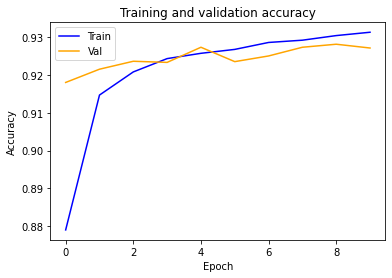

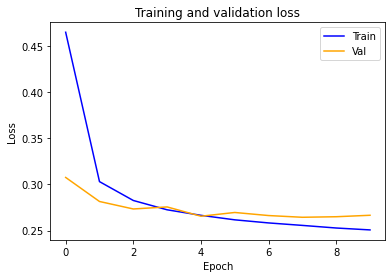

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# TODO
#
# 1. create a history object to store the results of model.fit
# ```history = model.fit(...)```


# 2. add another parameter to model.fit for validation data
# https://keras.io/models/sequential/

# model.fit(x_train, y_train, epochs=10)


# TODO, Steps 1 and 2
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs =10)





# A plotting function you can reuse
def plot(history):
  
  # The history object contains results on the training and test
  # sets for each epoch
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get the number of epochs
  epochs = range(len(acc))

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  _ = plt.figure()
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.plot(epochs, val_loss, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  
plot(history)

### 1b: Implement a neural network 

**TODO**

Modify the code below to create a neural network (with a single hidden layer). Add a Dense layer with 128 units and ReLU activation. Train and evaluate your model. How does the accuracy compare with the linear model above? It is not necessary to produce plots for this section.

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2634 - accuracy: 0.9258 - val_loss: 0.1318 - val_accuracy: 0.9627
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1165 - accuracy: 0.9651 - val_loss: 0.1041 - val_accuracy: 0.9695
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0801 - accuracy: 0.9754 - val_loss: 0.0802 - val_accuracy: 0.9754
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0611 - accuracy: 0.9814 - val_loss: 0.0741 - val_accuracy: 0.9780
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0450 - accuracy: 0.9862 - val_loss: 0.0845 - val_accuracy: 0.9753


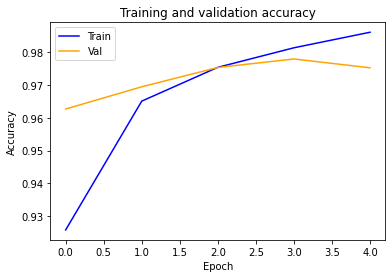

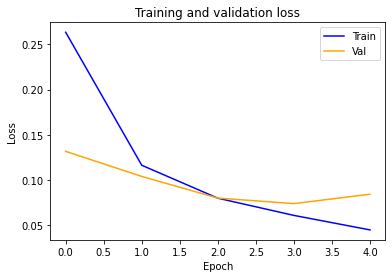

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'), # Added single hidden layer with 128 units and relu activation
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

neural_history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs =5)
plot(neural_history)

The performance with an added hidden layer has improved upon the result from 1a. Our best accuracy there is around 92% and with a hidden layer we are closer to 97%

### 1c: Implement a deep neural network 

**TODO**

Modify the code below to create and train a deep neural network with at least two hidden layers.

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2366 - accuracy: 0.9286 - val_loss: 0.1213 - val_accuracy: 0.9622
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1054 - accuracy: 0.9684 - val_loss: 0.1063 - val_accuracy: 0.9669
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0779 - accuracy: 0.9761 - val_loss: 0.0996 - val_accuracy: 0.9697
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0625 - accuracy: 0.9803 - val_loss: 0.0917 - val_accuracy: 0.9719
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0505 - accuracy: 0.9842 - val_loss: 0.0901 - val_accuracy: 0.9745


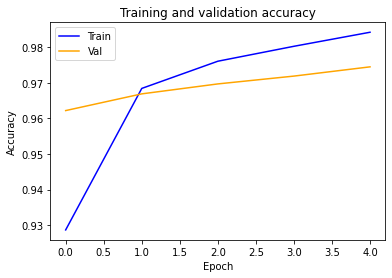

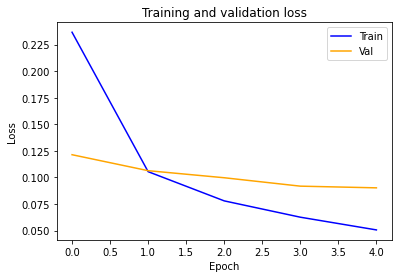

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

deep_history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=5)
plot(deep_history)

### 1d: Display predictions and their confidence 

**TODO**

1. Choose one of your models above. Use it to make predictions on the entire test set using ```model.predict```

2. Next, identify one image from the testing set the model classifies correctly, and another that it classifies incorrectly. Add code to display these images below, the correct labels, the predicted labels, and the confidence scores.

In [ ]:
# TODO: add your code here
predictions = model.predict(x_test)


# Check the first ten predicted labels and true labels to find examples of correct and incorrect predictions

# Create lists for all correct and incorrect positions
correct_prediction_indicies = []
incorrect_prediction_indicies = []

for i in range(len(predictions)):
  if (tf.math.argmax(predictions[i]) == y_test[i]): # Prediction is correct
    correct_prediction_indicies.append(i)
  else:
    incorrect_prediction_indicies.append(i)
    

print(f'The first correct prediction occurs at index={correct_prediction_indicies[0]}')
print(f'The first incorrect prediction occurs at index={incorrect_prediction_indicies[0]}')

The first correct prediction occurs at index=0
The first incorrect prediction occurs at index=18


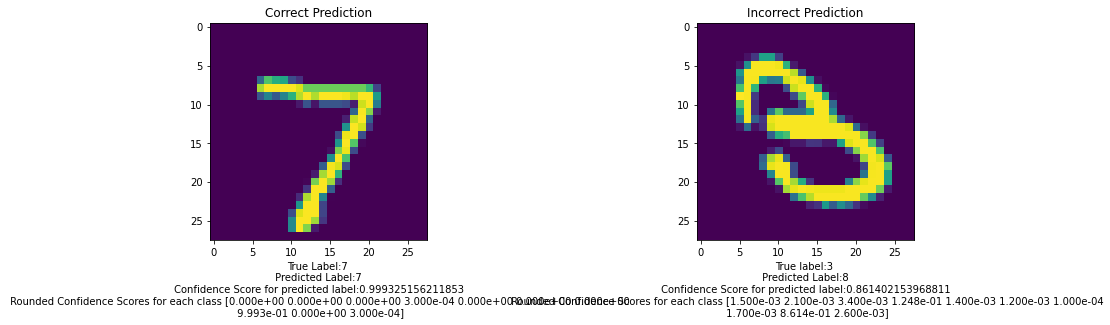

In [ ]:
# So we can assign variables to avoid typing the full list for clarity
first_correct_pred_index = correct_prediction_indicies[0]
first_incorrect_pred_index = incorrect_prediction_indicies[0]


# Unclear about confidence score

fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,4)

ax[0].set_title("Correct Prediction")
ax[0].set_xlabel(f'True Label:{y_test[first_correct_pred_index]} \n Predicted Label:{np.argmax(predictions[first_correct_pred_index])} \n Confidence Score for predicted label:{np.max(predictions[first_correct_pred_index])} \n Rounded Confidence Scores for each class {np.round(np.array(predictions[first_correct_pred_index]),4)}')

ax[1].set_title("Incorrect Prediction")
ax[1].set_xlabel(f'True label:{y_test[first_incorrect_pred_index]} \n Predicted Label:{np.argmax(predictions[first_incorrect_pred_index])} \n Confidence Score for predicted label:{np.max(predictions[first_incorrect_pred_index])} \n Rounded Confidence Scores for each class {np.round(np.array(predictions[first_incorrect_pred_index]),4)}')

ax[0].imshow(x_test[first_correct_pred_index])
ax[1].imshow(x_test[first_incorrect_pred_index])

## Part 2: Subclassed models

In this part of the assignment, you'll work with the Keras Subclassing API. Instead of using a built-in method (```model.fit```) you will train models using a GradientTape.

Here are a few code examples that will help you with this part of the assignment:

* [Get started for experts](https://www.tensorflow.org/tutorials/quickstart/advanced)
* [Eager execution](https://www.tensorflow.org/guide/eager)
* [Keras overview](https://www.tensorflow.org/guide/keras/overview)
* [Writing custom models](https://www.tensorflow.org/guide/keras/custom_layers_and_models)

### Download and prepare a dataset
This is similar to the above, except now we'll use ```tf.data``` to batch and shuffle the data, instead of the utilities baked into ```model.fit```. It's not necessary for this assignment, but if you wish, you can learn how to use tf.data [here](https://www.tensorflow.org/guide/data).

In [ ]:
# Download a dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Batch and shuffle the data
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train.astype('float32') / 255, y_train)).shuffle(1024).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices(
    (x_test.astype('float32') / 255, y_test)).batch(32)

tf.Tensor(6, shape=(), dtype=uint8)


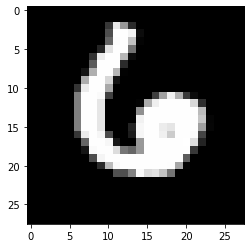

In [ ]:
# A quick example of iterating over a dataset object
for image, label in train_ds.take(1):
  plt.imshow(image[0], plt.get_cmap('gray'))
  print(label[0])

### Define and train a linear model

In [ ]:
class MyLinearModel(Model):
  def __init__(self):
    super(MyLinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10, activation='softmax', name="dense1")

  def call(self, x):
    x = self.flatten(x)
    return self.d1(x)

In [ ]:
model = MyLinearModel()

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD()

# For each epoch
for epoch in range(5):

  # For each batch of images and labels
  for images, labels in train_ds:

    # Open a GradientTape.
    with tf.GradientTape() as tape:

      # Forward pass
      predictions = model(images)

      # Calculate loss
      loss = loss_fn(labels, predictions)

    # Backprop to calculate gradients
    gradients = tape.gradient(loss, model.trainable_variables)

    # Gradient descent step
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  # Calculate loss on the test data
  test_loss = []
  for images, labels in test_ds: 
    predictions = model(images)
    loss_on_batch = loss_fn(labels, predictions)
    test_loss.append(loss_on_batch)
    
  print("Epoch {}, Test loss: {}".format(epoch, tf.reduce_mean(test_loss)))

Epoch 0, Test loss: 0.4804511070251465
Epoch 1, Test loss: 0.40106168389320374
Epoch 2, Test loss: 0.36817216873168945
Epoch 3, Test loss: 0.3493117392063141
Epoch 4, Test loss: 0.3366369605064392


Note: you may have noticed that the above code runs slowly (it's executing eagerly). Later in this notebook, you will compile your code (to run it in graph mode) using ```@tf.function```. The general workflow is to write your code without using tf.function (as shown above, which makes for easier debugging). Once you've finished debugging your model, you can add ```@tf.function``` for performance if necessary.

### 2a: Visualize the learned weights

We can interpret a linear model by looking at the weights of the fully connected layer. Modify the below code to create a plot similar to the one on from lecture 1:

![Plot of weights](https://storage.googleapis.com/applied-dl/im/mnist-weights.png)

**TODO**

Modify the below code to retrieve the learned weights. You can use either the public API of a model ```model.get_layer(name)``` then retrieve the weights from that, or (because our model is defined using the Subclassing API), you can access the dense layer directly ```model.d1```.

In [ ]:
# There are two ways to retrieve the weights. You can use the public API
# (model.get_layer(name).get_weights()), or, you can access the dense layer 
# directly (model.dl) then find the accessor method, or again, access the
# variable directly.
# Python tip: try ```dir(model.d1)```

# TODO: modify this code to get the weights
weights, bias = model.get_layer('dense1').get_weights()
print(weights.shape)

(784, 10)


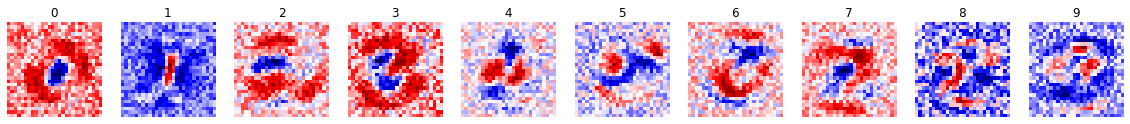

In [ ]:
fig, axs = plt.subplots(1,10, figsize=(20,20))
for i in range(10):
  subplot = axs[i]
  subplot.set_title(i)
  subplot.axis('off')
  # TODO: modify this code to complete the plotting function
  i_weights = weights[:,i]
  img = i_weights.reshape(28,28) # Reshape the weights into a 28x28 array
  subplot.imshow(img, plt.get_cmap('seismic'))
plt.show()

### 2b: Implement a deep neural network

**TODO**

Modify this code to create a deep neural network. Train your model using the code below, and compare the accuracy to the linear model above. 

Note: you do not need to modify any sections other than the model definition and the call method. 

The code below uses compiled versions of the training and evaluation loops (remove the ```@tf.function``` annotations if you need to debug).

In [ ]:
class MyDNN(Model):
  def __init__(self):
    super(MyDNN, self).__init__()
    self.flatten = Flatten()
    # Modify me
    self.d0 = Dense(32, activation='relu')
    self.d1 = Dense(32, activation='relu')
    self.d2 = Dense(256, activation='relu')
    self.d3 = Dense(256, activation='relu')
    self.d4 = Dense(256, activation='relu')
    self.d5 = Dense(256, activation='relu')
    self.d6 = Dense(256, activation='relu')
    self.d7 = Dense(256, activation='relu')
    self.d8 = Dense(256, activation='relu')
    self.d9 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    return self.d9(x)

model = MyDNN()

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

These are helper functions we'll use to record loss and accuracy while your model is trained.

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

This method trains the model on a batch of data.

In [ ]:
# @tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

This method evaluates the model on a batch of data.

In [ ]:
# @tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

Training and evaluation loop.

In [ ]:
EPOCHS = 5

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

Epoch 1, Loss: 0.46528396010398865, Accuracy: 87.7750015258789, Test Loss: 0.31016674637794495, Test Accuracy: 91.18999481201172
Epoch 2, Loss: 0.3036545515060425, Accuracy: 91.5199966430664, Test Loss: 0.28102433681488037, Test Accuracy: 91.93999481201172
Epoch 3, Loss: 0.28309762477874756, Accuracy: 92.06832885742188, Test Loss: 0.2781257629394531, Test Accuracy: 92.04000091552734
Epoch 4, Loss: 0.27283066511154175, Accuracy: 92.3933334350586, Test Loss: 0.270180881023407, Test Accuracy: 92.40999603271484
Epoch 5, Loss: 0.2661150097846985, Accuracy: 92.58000183105469, Test Loss: 0.27094125747680664, Test Accuracy: 92.31999969482422


### 2c: Provide your own implementation of softmax and use it to train a model

In your linear model above, the starter code looked similar to: 


```
class LinearModel(Model):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    return self.d1(x)
``` 

Now, create a function:


```
def my_softmax(logits):
  # ...
```

and use it in your model as follows:


```
class LinearModel(Model):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10)

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    return my_softmax(x)
``` 

Notice, we've removed the built-in activation method on the Dense layer, and added our own to the call method.

Tip: You can implement softmax first using NumPy, if you like, the gradually convert your code to use TensorFlow ops (which begin with tf.\* instead of np.\*).

Notes: 

- Your softmax implementation should be numerically stable. 
- You will need to use tf.* ops in order to use your code to train a model (TF cannot backprop through NumPy operations).

In [ ]:
# TODO: your code here

def my_softmax(x):  
  # Per TF docs softmax is defined as: 
  # softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis)
  softmax_value = tf.exp(x) / tf.reduce_sum(tf.exp(x))
  return softmax_value

class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10)

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    return my_softmax(x)
  
model = MyModel()

# TODO
# Add code to train this model
# When it's trained, the accuracy should be similar to the linear
# model from part one (but not identical, the weights are initialized randomly)

In [ ]:
EPOCHS = 5

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

Epoch 1, Loss: 0.3516736328601837, Accuracy: 90.15833282470703, Test Loss: 0.2892029881477356, Test Accuracy: 91.87999725341797
Epoch 2, Loss: 0.28587257862091064, Accuracy: 91.95999908447266, Test Loss: 0.27440303564071655, Test Accuracy: 92.13999938964844
Epoch 3, Loss: 0.2725640833377838, Accuracy: 92.39666748046875, Test Loss: 0.2661614716053009, Test Accuracy: 92.43999481201172
Epoch 4, Loss: 0.26358696818351746, Accuracy: 92.62166595458984, Test Loss: 0.2610040307044983, Test Accuracy: 92.5199966430664
Epoch 5, Loss: 0.2585785686969757, Accuracy: 92.81832885742188, Test Loss: 0.25819528102874756, Test Accuracy: 92.62999725341797


After defining our softmax we can see the Accuracy and test accuracy are similar to the accuracy reported from the pre defined softmax. This variation is small enough that we can attribute it to initialization.